In [2]:
import pandas as pd
import numpy as np

In [3]:
excel_file = pd.ExcelFile('C:/Users/owner/Desktop/School/FINM25000/multi_asset_etf_data.xlsx')

In [4]:
print(excel_file.sheet_names)

['descriptions', 'prices', 'total returns', 'excess returns']


In [5]:
xsReturns = pd.read_excel(excel_file, sheet_name='excess returns', index_col=0, parse_dates=[0])
pd.set_option('display.width', 200) 
print(xsReturns)

                 BWX       DBC       EEM       EFA       HYG       IEF       IYR       PSP       QAI       SPY       TIP
Date                                                                                                                    
2011-02-28  0.007027  0.042120 -0.000027  0.035908  0.014763 -0.001674  0.045614  0.040556  0.002993  0.035147  0.007618
2011-03-31  0.008755  0.026909  0.063224 -0.023555  0.000752 -0.001218 -0.010607  0.016995  0.005849  0.000448  0.012231
2011-04-30  0.048760  0.045514  0.027283  0.056214  0.015932  0.018369  0.046589  0.058627  0.018989  0.028917  0.023735
2011-05-31 -0.012945 -0.051124 -0.028800 -0.021461  0.001933  0.025654  0.010733 -0.040965  0.000600 -0.010615  0.003259
2011-06-30  0.000230 -0.042318 -0.009027 -0.011781 -0.005378 -0.004716 -0.030733 -0.042254 -0.010449 -0.016542  0.007876
...              ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...
2025-01-31 -0.002198  0.024463  

In [6]:
# Annualized mean, vol, and Sharpe
mean_annualized = xsReturns.mean() * 12
vol_annualized = xsReturns.std() * (12 ** 0.5)
sharpe_annualized = mean_annualized / vol_annualized

summary_stats = pd.DataFrame({
    "Mean (Annualized)": mean_annualized,
    "Volatility (Annualized)": vol_annualized,
    "Sharpe Ratio": sharpe_annualized
}).sort_values("Sharpe Ratio", ascending=False)

print(summary_stats)


     Mean (Annualized)  Volatility (Annualized)  Sharpe Ratio
SPY           0.128141                 0.142839      0.897103
HYG           0.041371                 0.075928      0.544873
IYR           0.074916                 0.168675      0.444143
PSP           0.092561                 0.213370      0.433804
EFA           0.061775                 0.150903      0.409372
TIP           0.020502                 0.051115      0.401091
QAI           0.019327                 0.049073      0.393838
IEF           0.016404                 0.063442      0.258569
EEM           0.029339                 0.176164      0.166542
DBC          -0.005292                 0.166553     -0.031774
BWX          -0.007716                 0.082789     -0.093202


In [7]:
def performance_summary(xsReturns, adj_factor=12):
    summary = {}
    summary["Annualized Mean"] = xsReturns.mean() * adj_factor
    summary["Annualized Volatility"] = xsReturns.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=xsReturns.columns)


In [8]:
metrics = performance_summary(xsReturns).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)

metrics.style.format("{:.2}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.13,0.14,0.9
HYG,0.041,0.076,0.54
IYR,0.075,0.17,0.44
PSP,0.093,0.21,0.43
EFA,0.062,0.15,0.41
TIP,0.021,0.051,0.4
QAI,0.019,0.049,0.39
IEF,0.016,0.063,0.26
EEM,0.029,0.18,0.17
DBC,-0.0053,0.17,-0.032


SPY takes the lead with the highest Sharpe ratio, standing well above the rest at 0.90. The next tier includes HYG, IYR, PSP, EFA, TIP, and QAI, all clustered in the 0.54 to 0.4 range, offering moderate risk-adjusted returns. At the bottom, BWX & DBC posted negative Sharpe ratios, making them the weakest performers in terms of excess return per unit of risk.

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [10]:
corr_trix = xsReturns.corr()

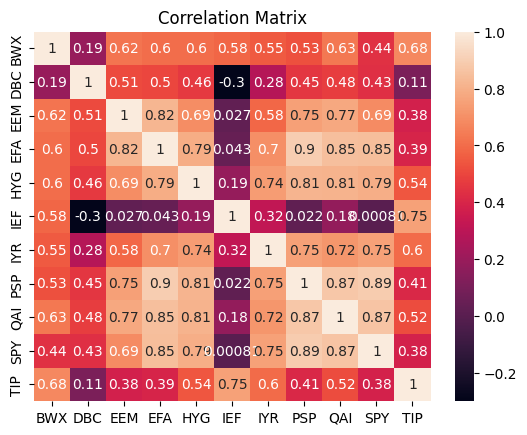

In [11]:
plt.figure()
sns.heatmap(corr_trix, annot=True)
plt.title("Correlation Matrix")
plt.show()

(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'Correlation Matrix'}>)

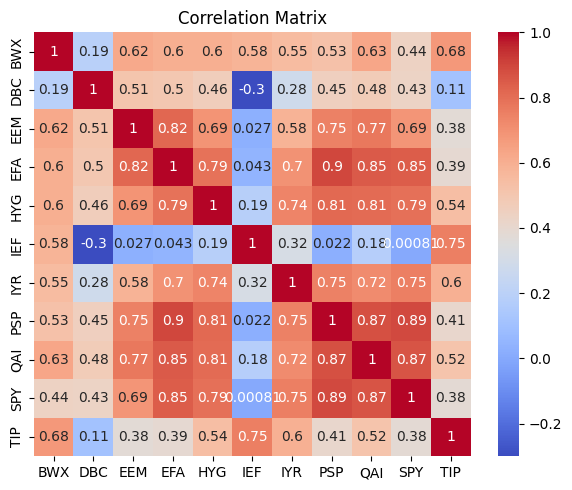

In [12]:
def plot_corr_matrix(corrs, title='Correlation Matrix'):
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(
        corrs, annot=True, cmap='coolwarm',
    )
    ax.set_title(title)
    fig.tight_layout()
    return fig, ax

plot_corr_matrix(xsReturns.corr())

(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'Correlation Matrix'}>)

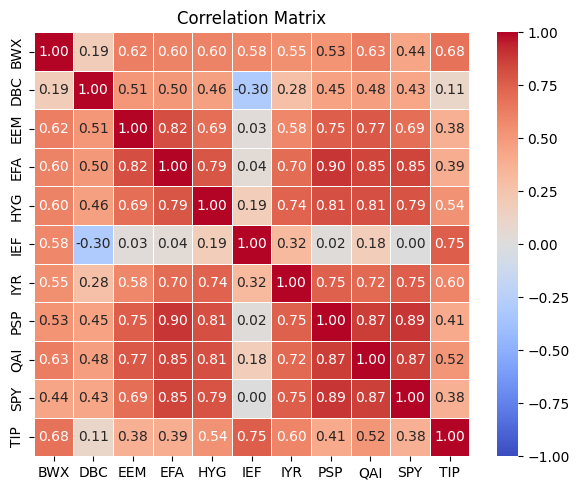

In [13]:
def plot_corr_matrix(corrs, title='Correlation Matrix'):
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(
        corrs, annot=True, cmap='coolwarm',
        vmin=-1, vmax=1, linewidths=0.7, fmt='.2f',
        annot_kws={'size':10}, ax=ax
    )
    ax.set_title(title)
    fig.tight_layout()
    return fig, ax

plot_corr_matrix(xsReturns.corr())

In [14]:
corr_series = corr_trix.unstack()

corr_series = corr_series[corr_series != 1]

max_corr = corr_series.idxmax()
min_corr = corr_series.idxmin()

max_corr_val = corr_series[max_corr]
min_corr_val = corr_series[min_corr]


Note, the above code can also be written by using the DataFrame.agg method, which allows us to apply multiple functions to a DataFrame at once.

In [15]:
max_corr = corr_series.abs().agg(['idxmax', 'max']).T
min_corr = corr_series.abs().agg(['idxmin', 'min']).T

min_corr_raw = corr_series.agg(['idxmin', 'min']).T

max_corr, max_corr_val = max_corr['idxmax'], max_corr['max']
min_corr, min_corr_val = min_corr['idxmin'], min_corr['min']

min_corr_raw, min_corr_raw_val = min_corr_raw['idxmin'], min_corr_raw['min']

In [18]:
print(
    f"""Max Corr (by absolute value):
    {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_val:.2f}"""
)
print(
    f"""Min Corr (by absolute value):
    {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_val:.2f}"""
)
print(
    f"""Min Corr (raw):
    {min_corr_raw[0]} and {min_corr_raw[1]} with a correlation of {min_corr_raw_val:.2f}"""
)

Max Corr (by absolute value):
    EFA and PSP with a correlation of 0.90
Min Corr (by absolute value):
    IEF and SPY with a correlation of 0.00
Min Corr (raw):
    DBC and IEF with a correlation of -0.30


In [20]:
corr_matrix = xsReturns.corr()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_vals = corr_matrix.where(mask).unstack().dropna()
avg_corr = corr_vals.mean()
high_corr_count = (corr_vals > 0.6).sum()
total_pairs = len(corr_vals)
percent_high_corr = high_corr_count / total_pairs * 100
avg_corr_per_asset = xsReturns.corr().mean()
lowest_corr_assets = avg_corr_per_asset.sort_values().head(3)


In [ ]:
print('High Correlation Count:', high_corr_count)

26
